0.6355673756521115
0.8328647093266581


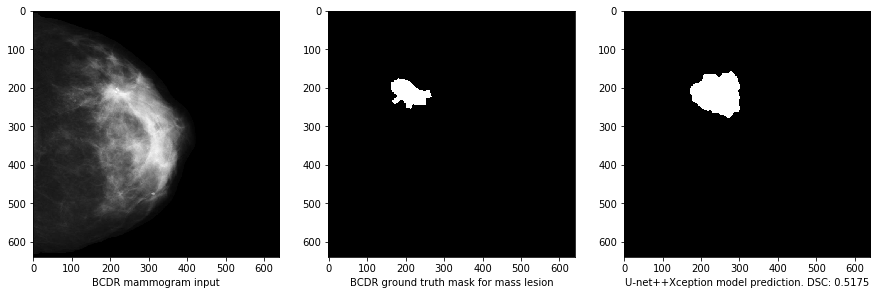

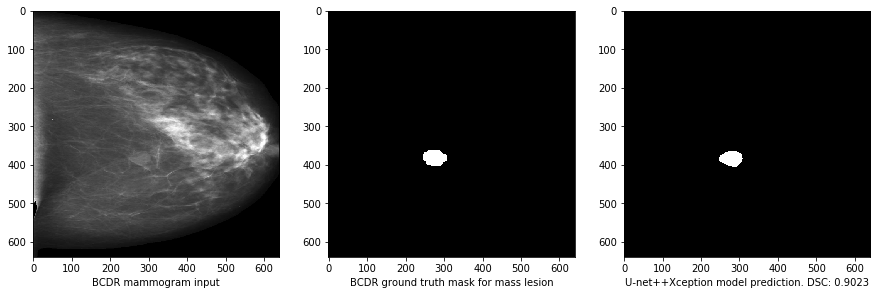

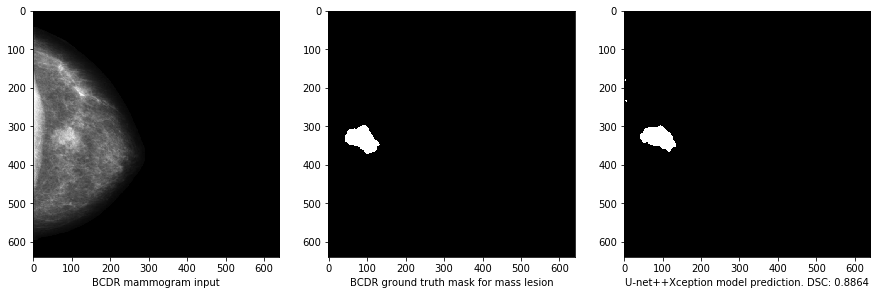

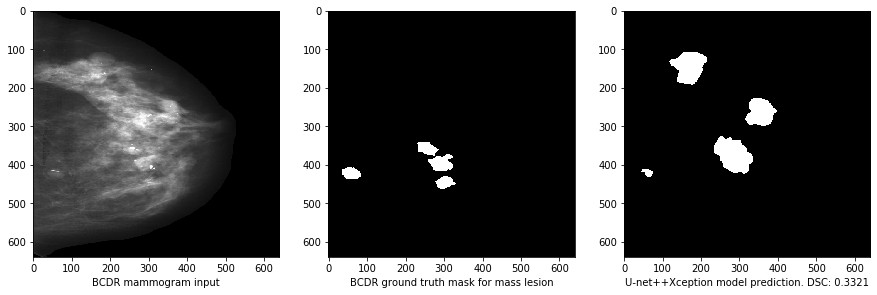

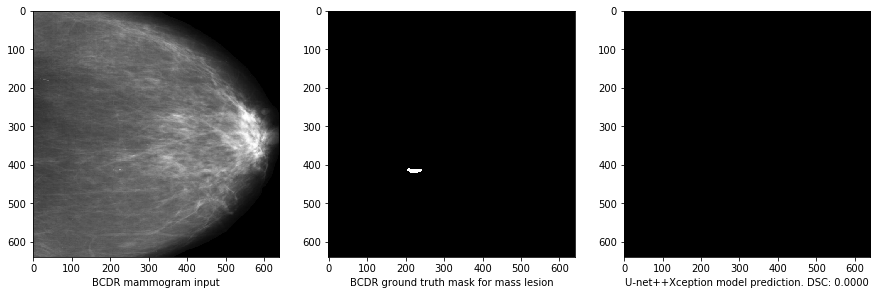

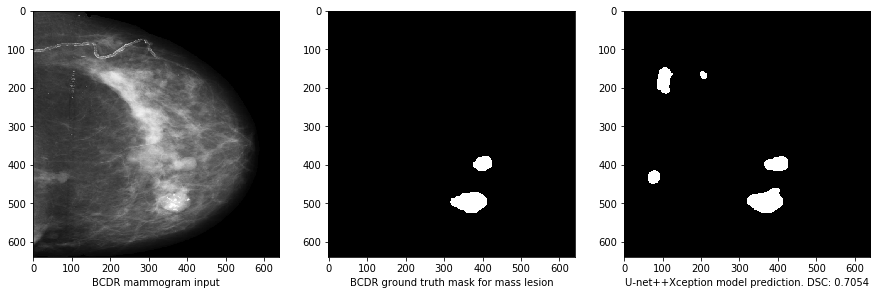

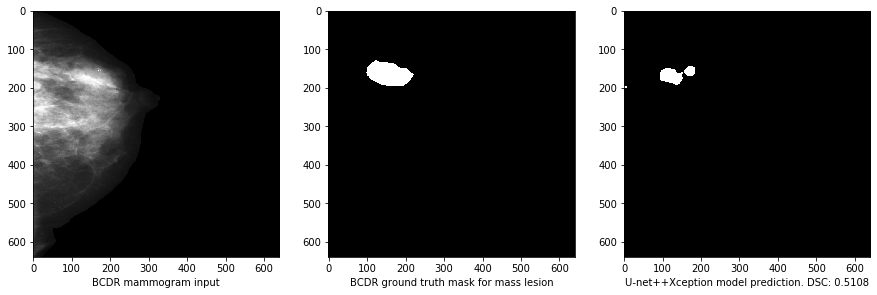

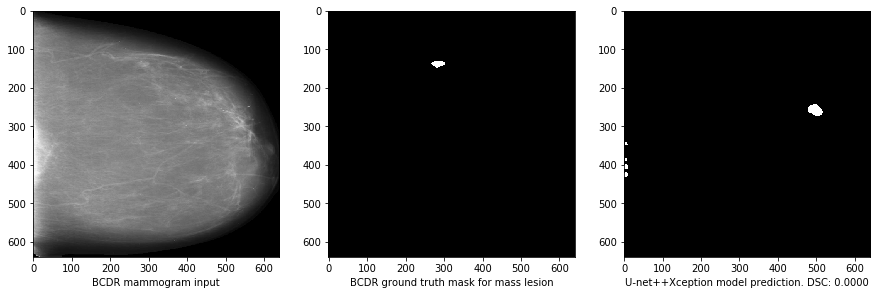

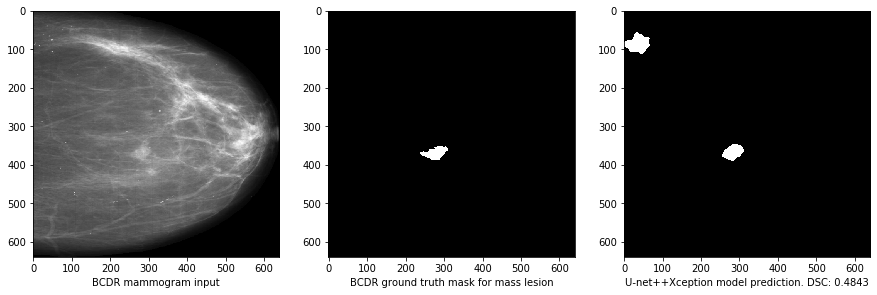

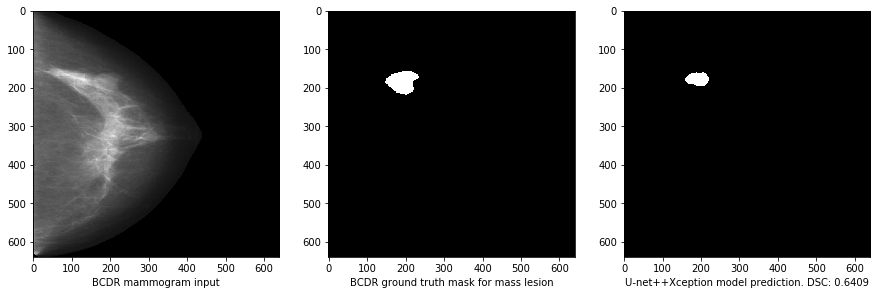

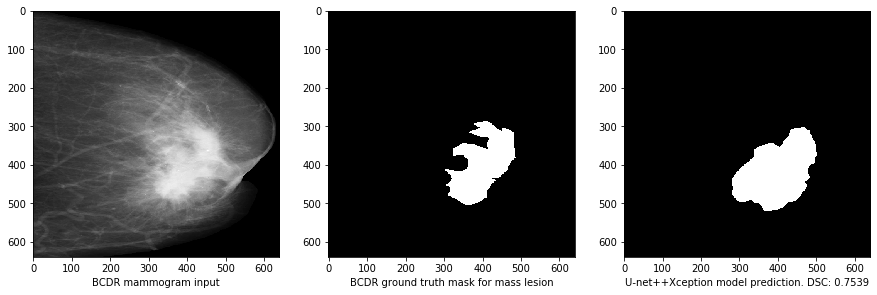

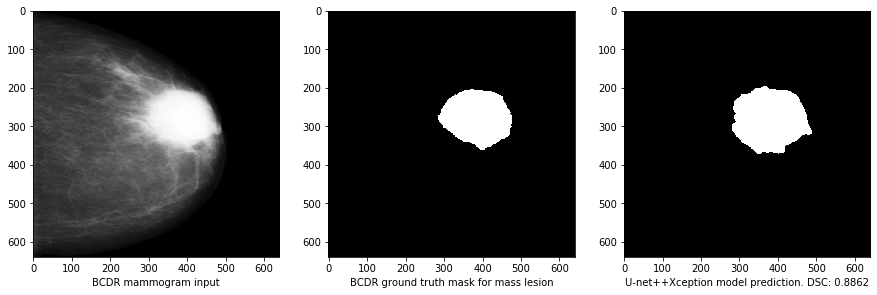

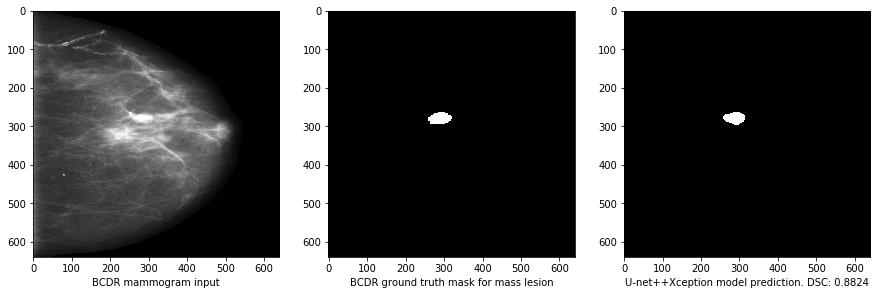

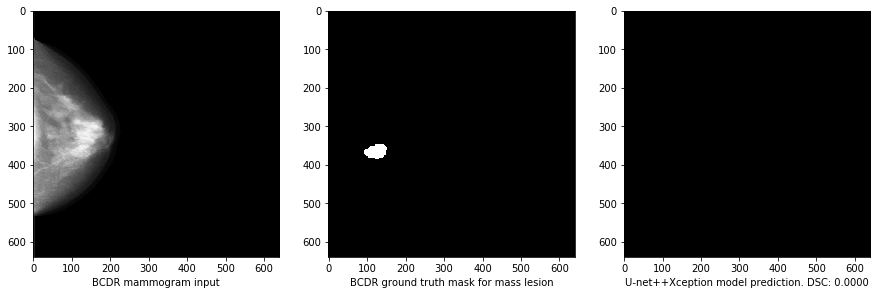

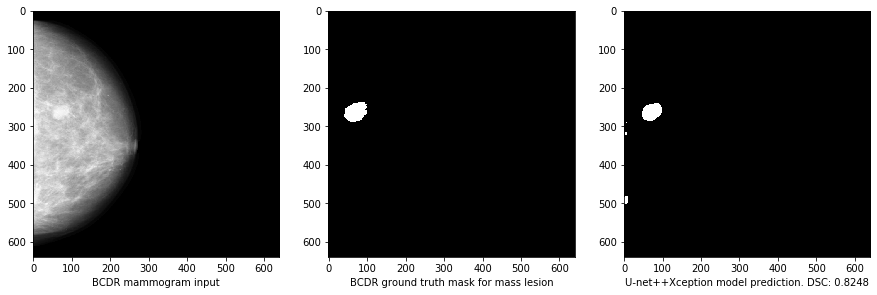

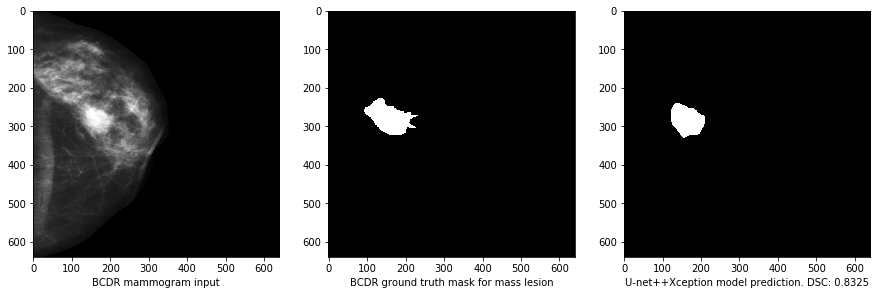

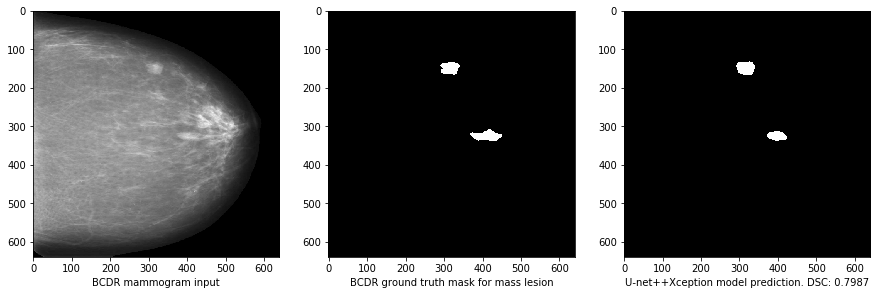

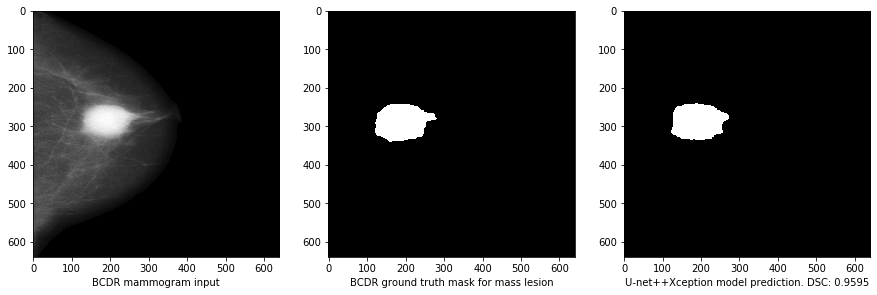

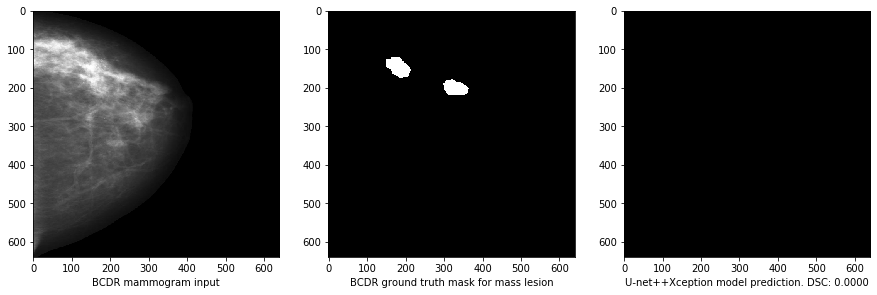

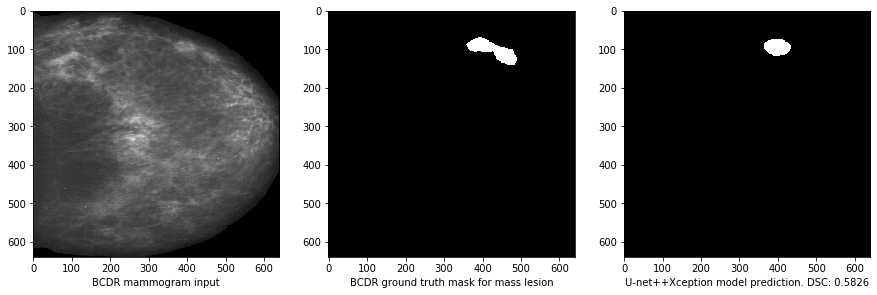

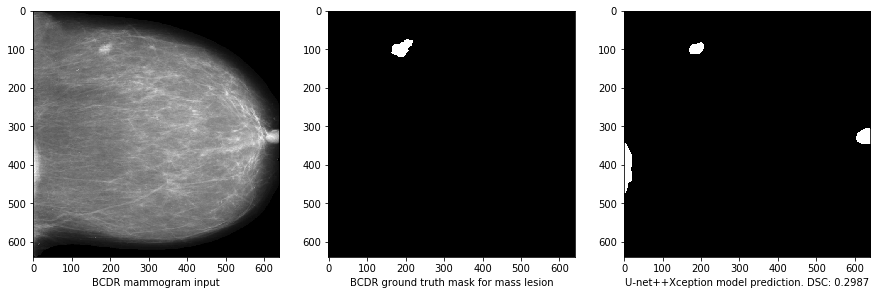

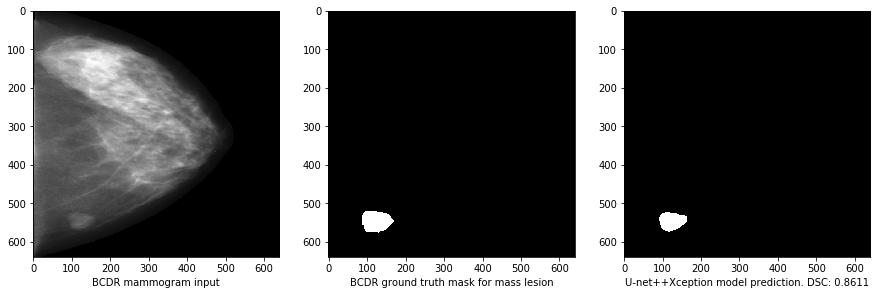

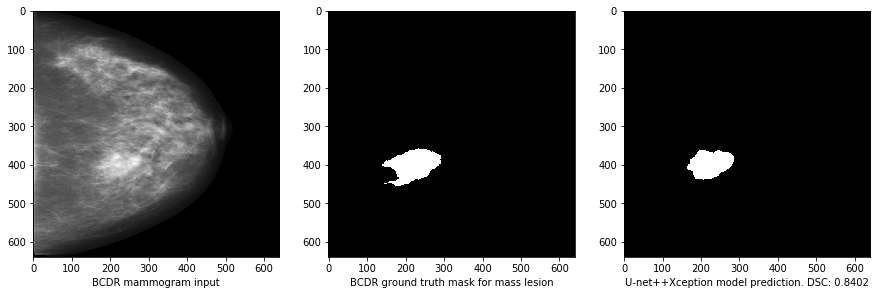

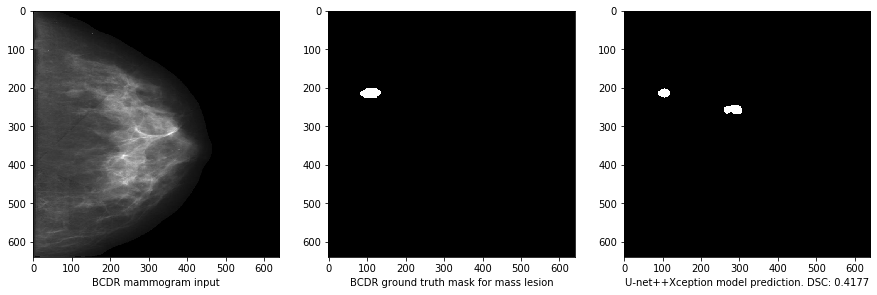

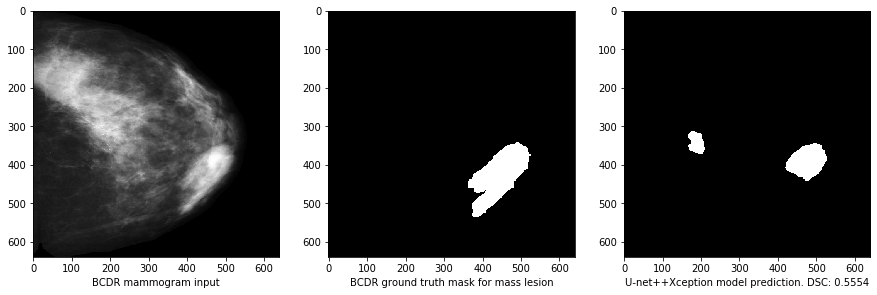

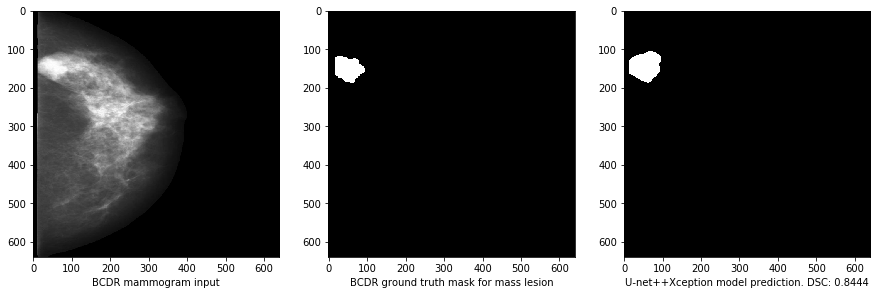

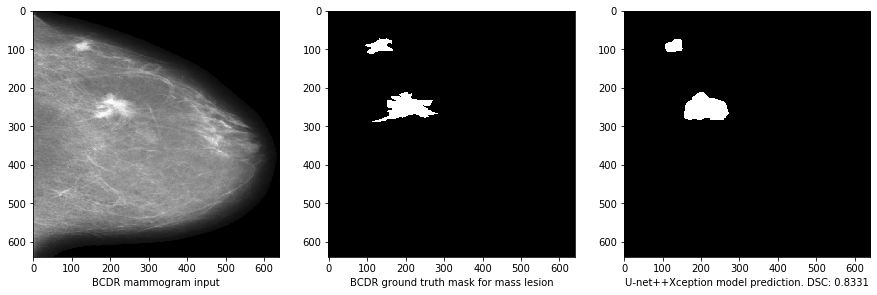

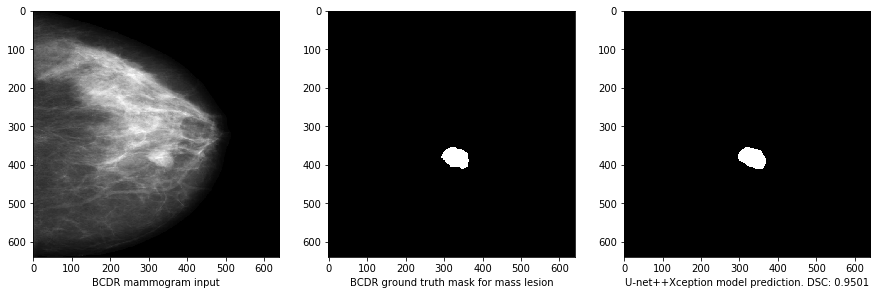

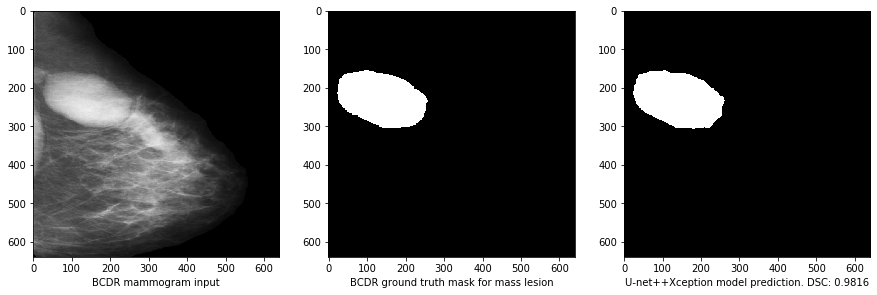

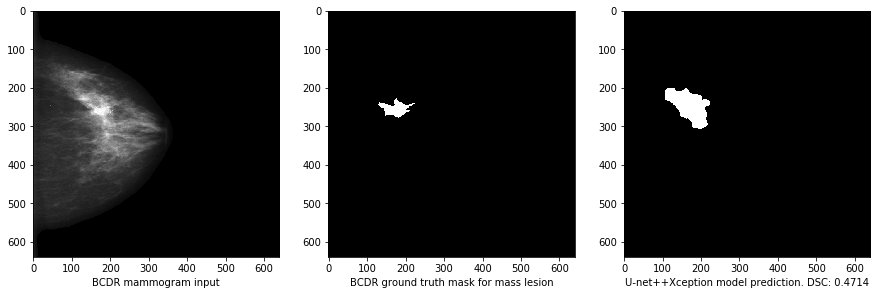

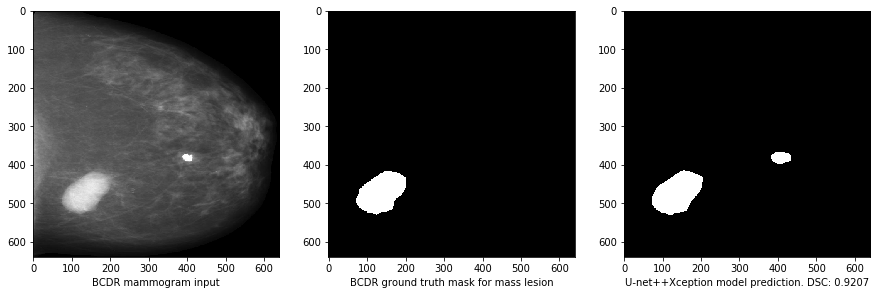

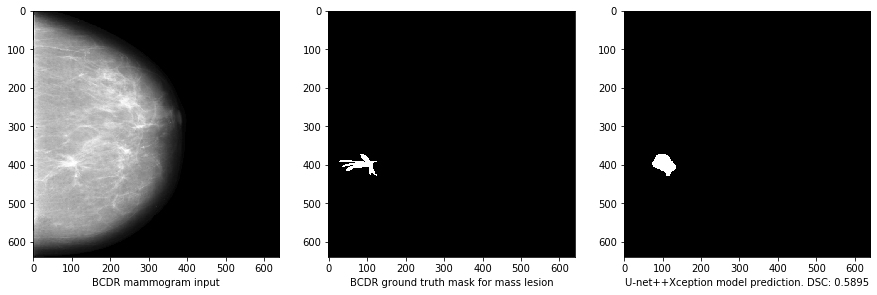

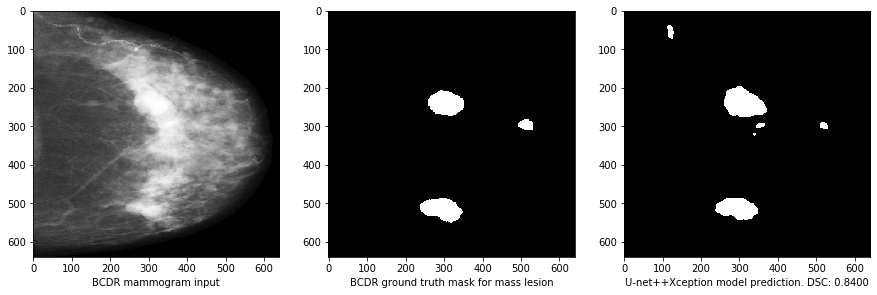

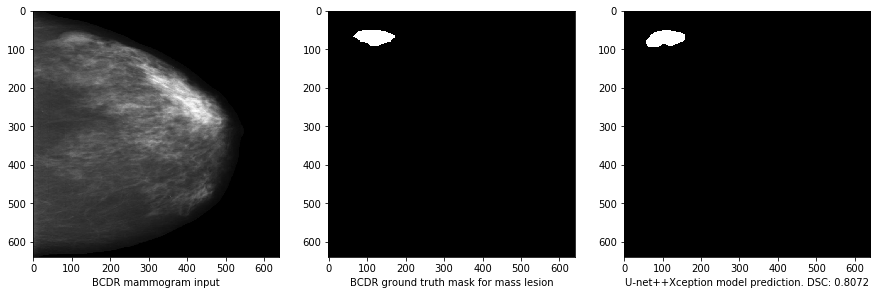

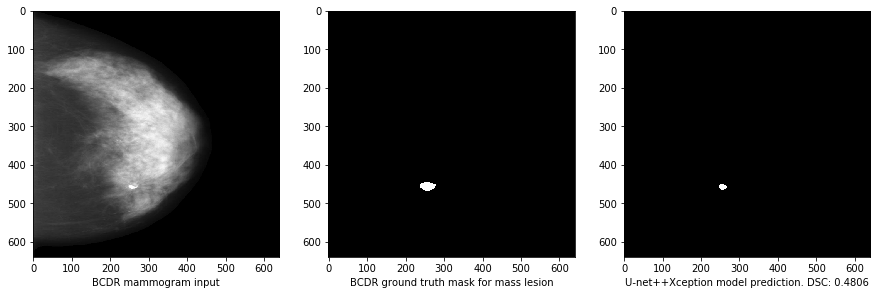

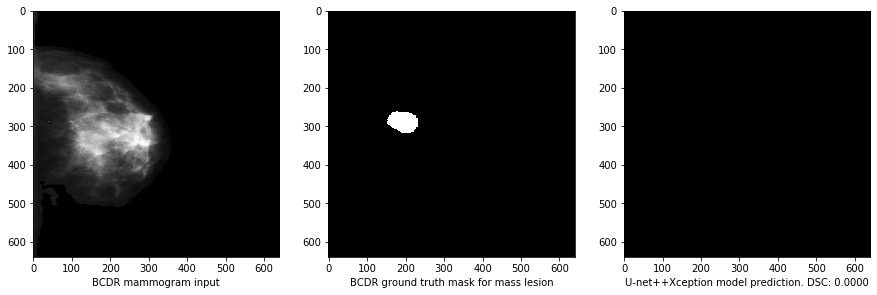

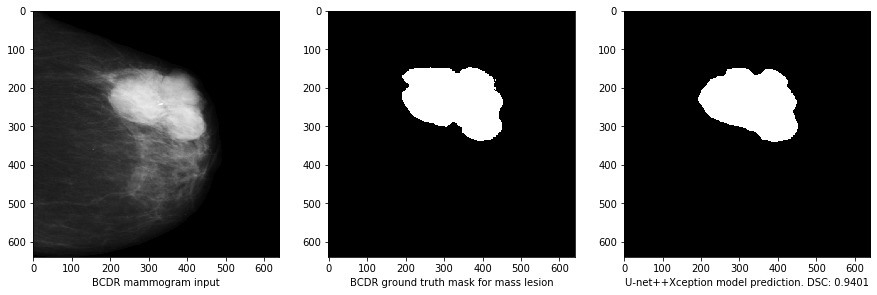

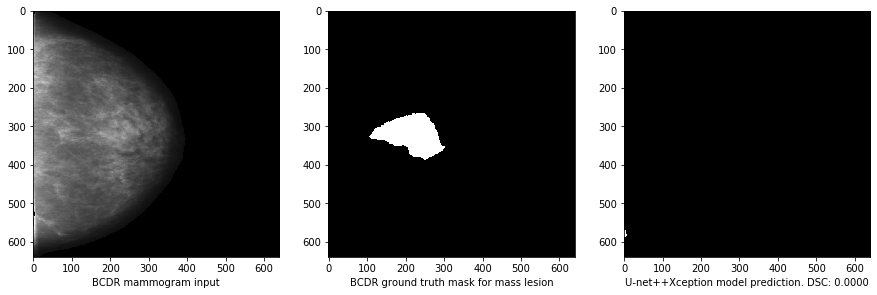

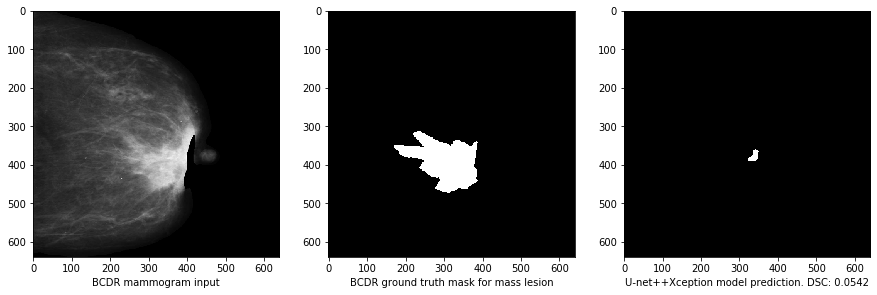

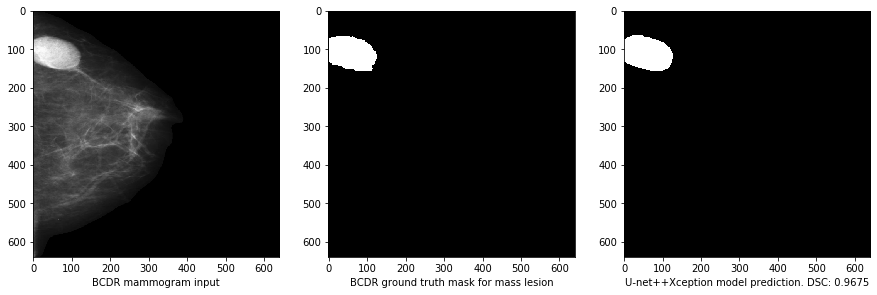

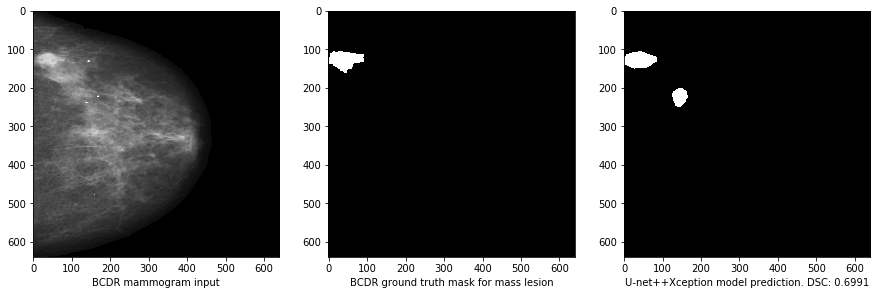

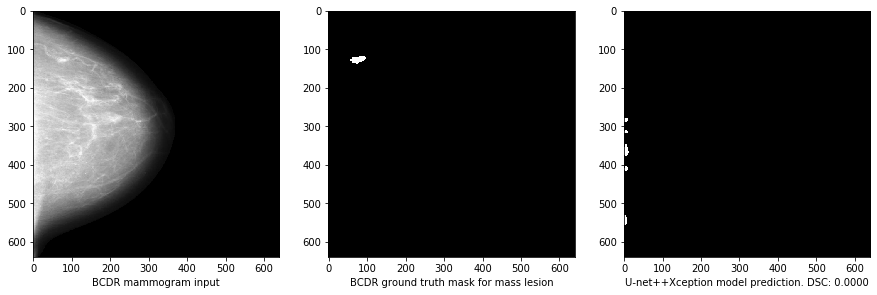

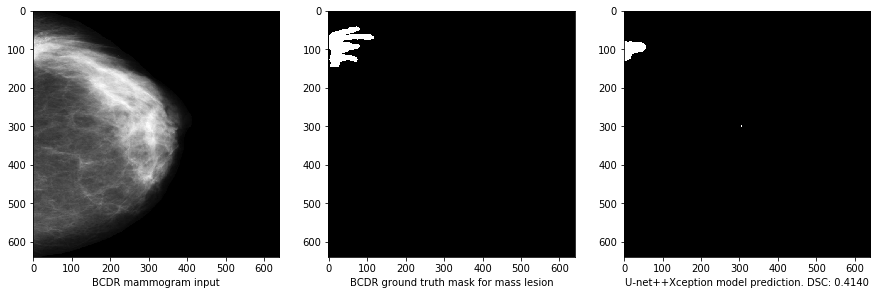

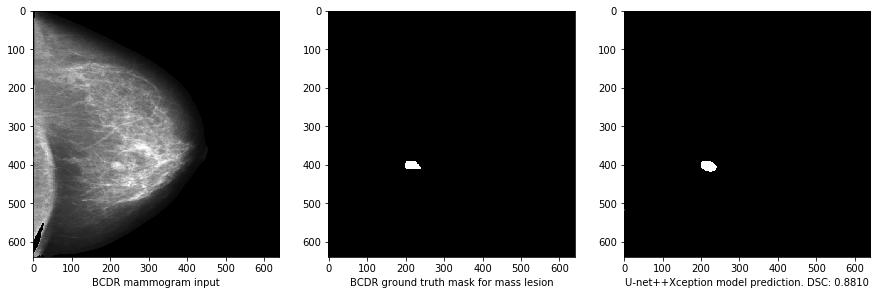

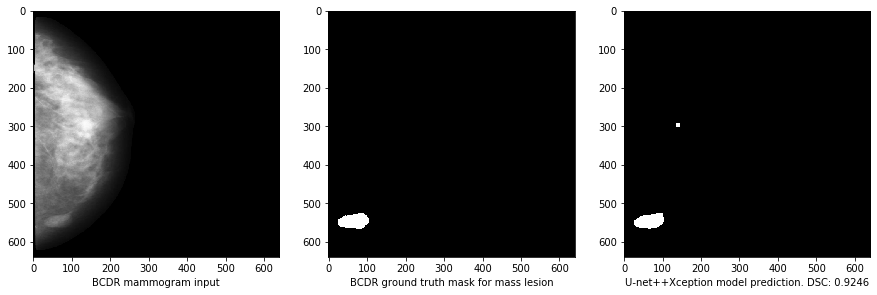

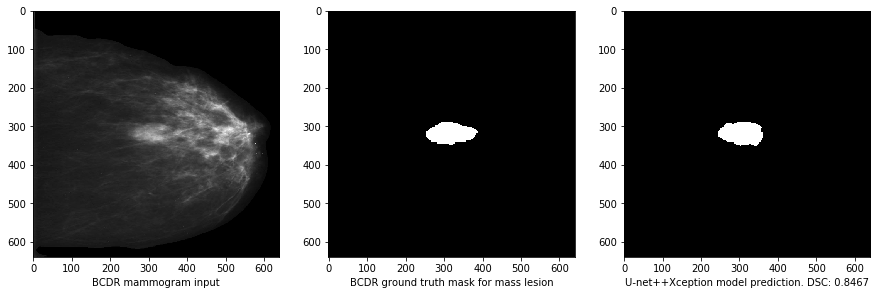

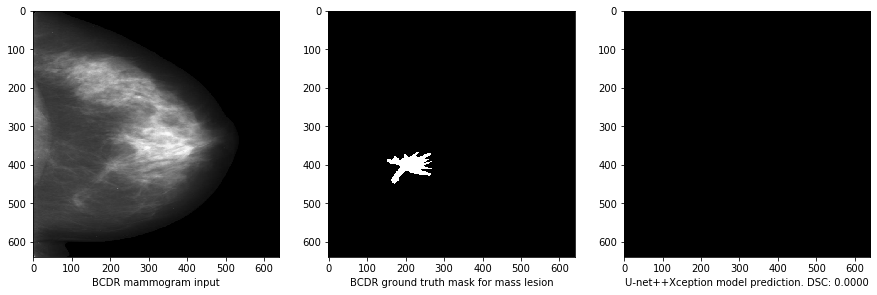

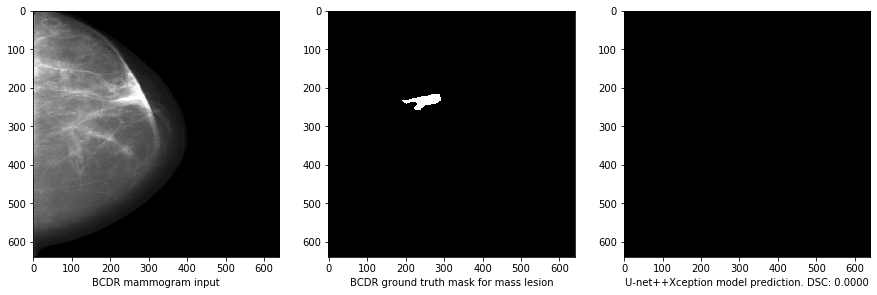

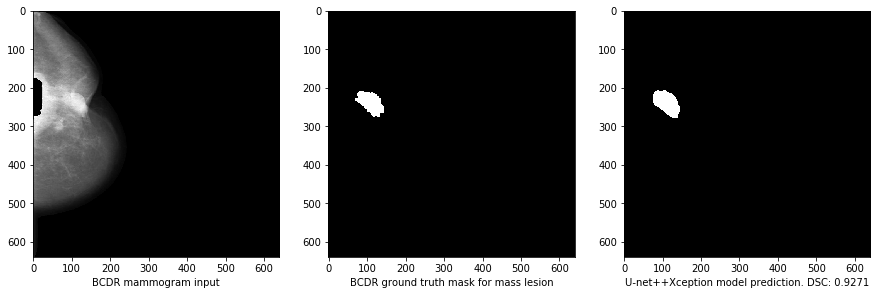

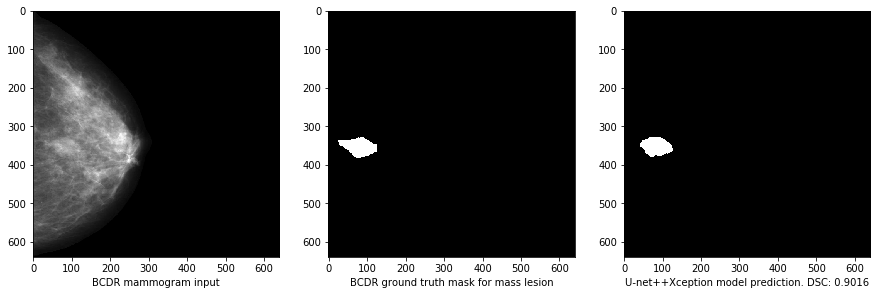

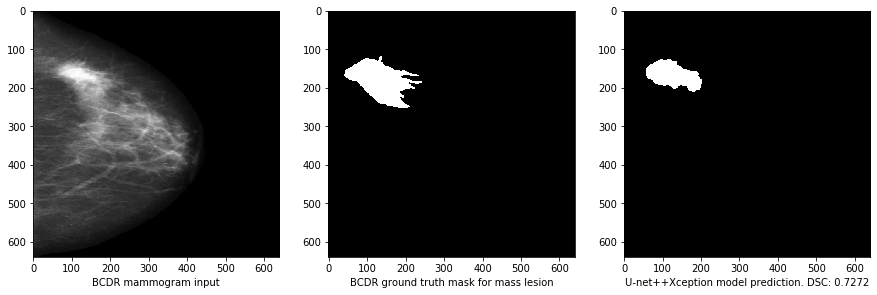

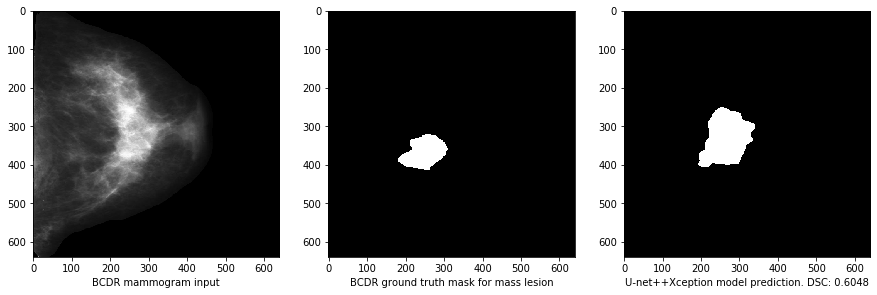

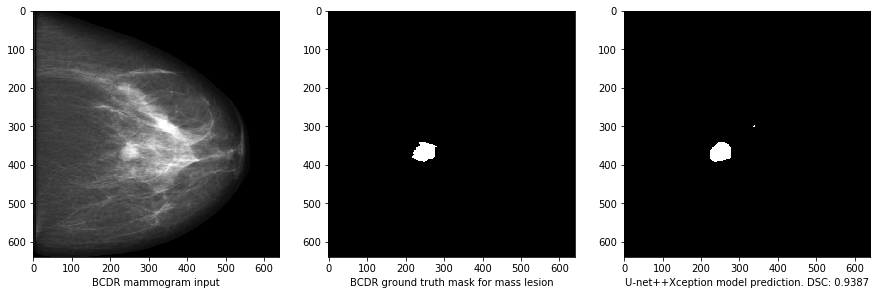

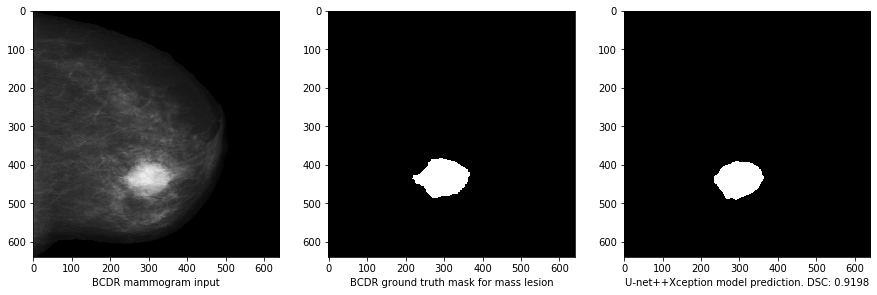

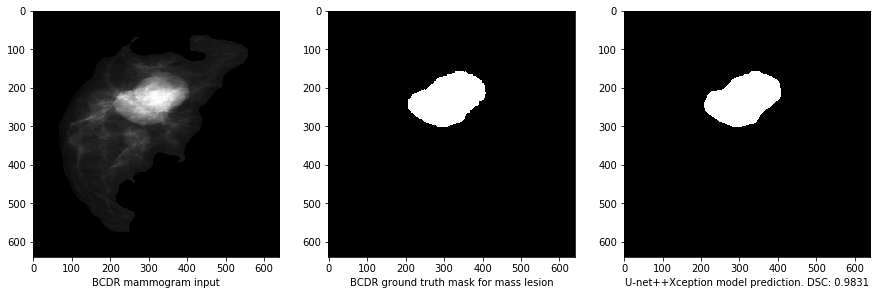

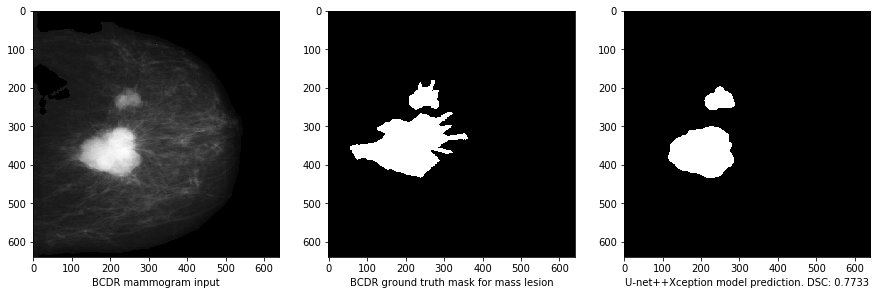

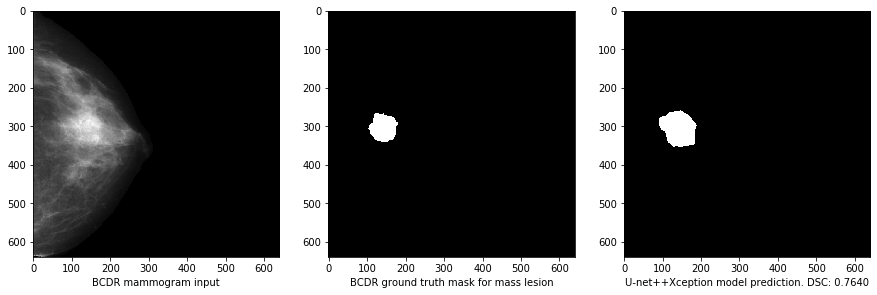

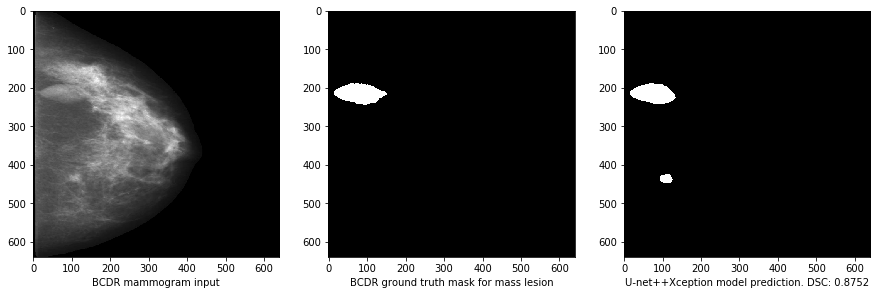

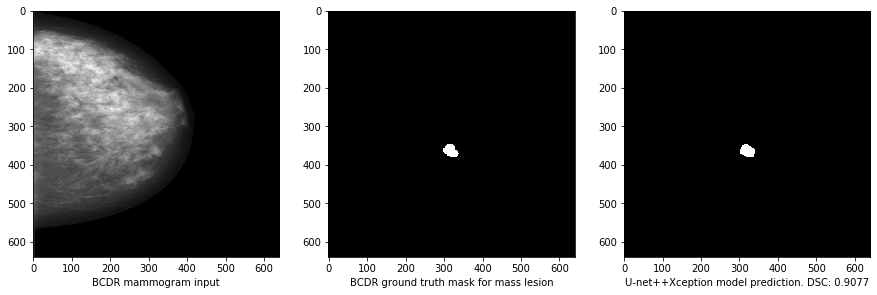

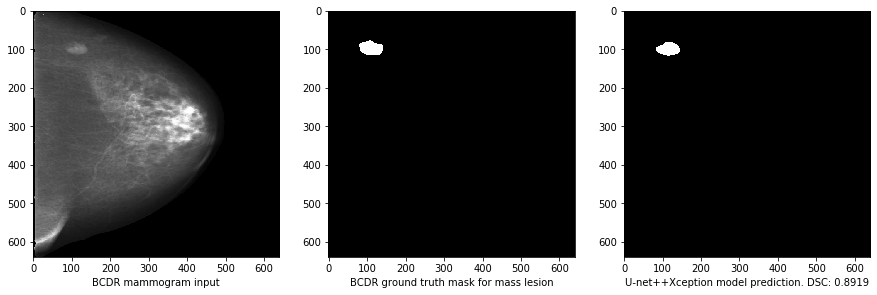

In [11]:
# MASS SEGMENTATION TEST RESULTS
# There are a total of 60 mammograms in the testing folder. Here is the result of each mammogram, its ground truth and the U-net++Xception prediction

import imageio
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import roc_auc_score
import numpy as np

target_folder='pred/'
dc=list() 
auc=list()

def dice_coef(y_true, y_pred):
    smooth = 1e-15
    intersection = sum(sum(y_true * y_pred))
    score = (2 * intersection + smooth) / (sum(sum(y_true)) + sum(sum(y_pred)) + smooth)
    return score

for num in range (0,60):                       # There are 60 test images
    mg_name = str(num) + '.png'                # input mammogram
    gt_name = str(num) + '_gt.png'             # ground truth
    pred_name = str(num) + '_predict_v013.png' # unet++xception prediction
    
    mg = cv2.imread(os.path.join(target_folder,mg_name))
    gt = cv2.imread(os.path.join(target_folder,gt_name))
    gt = cv2.cvtColor(gt, cv2.COLOR_BGR2GRAY)
    pred = cv2.imread(os.path.join(target_folder,pred_name))
    pred = cv2.cvtColor(pred, cv2.COLOR_BGR2GRAY)

    # Calculate AUC ROC
    gt_flat=gt.flatten()
    pred_flat=pred.flatten()
    auc.append(roc_auc_score(gt_flat, pred_flat))
    
    ret,thresh_pred = cv2.threshold(pred,127,1,cv2.THRESH_BINARY) 
    ret,thresh_gt = cv2.threshold(gt,127,1,cv2.THRESH_BINARY) 
    dc.append(dice_coef(thresh_gt,thresh_pred))
    
    plt.rcParams.update({'figure.max_open_warning': 0}) #supress warning
    fig = plt.figure()
    fig.set_size_inches(15,15)
    ax1 = fig.add_subplot(1,3,1)
    ax1.imshow(mg)
    ax1.set_xlabel('BCDR mammogram input')
    ax2 = fig.add_subplot(1,3,2)
    ax2.imshow(thresh_gt,cmap=plt.cm.gray)
    ax2.set_xlabel('BCDR ground truth mask for mass lesion')
    ax3 = fig.add_subplot(1,3,3)
    ax3.imshow(thresh_pred,cmap=plt.cm.gray)
    ax3.set_xlabel('U-net++Xception model prediction. DSC: {:.4f}'.format(dc[num]))


# Print mean DSC and AUC
print(np.mean(dc))
print(np.mean(auc))

In [6]:
print(auc)

[0.9230337605344585, 0.9369219055990835, 0.9383328979000726, 0.812082768916869, 0.5, 0.9881371914498702, 0.6876622636227797, 0.49848230826005563, 0.930318268522273, 0.7401650618982119, 0.9320571627244888, 0.9890612881527254, 0.9256952807180494, 0.5, 0.9015775437221635, 0.8705698766778768, 0.8692662544843947, 0.9756997893389003, 0.5, 0.7259744581500549, 0.7765425465090008, 0.88285845914011, 0.871112041974337, 0.7457610904426597, 0.7164406113723312, 0.9837935174658204, 0.9120507118101856, 0.984417327714157, 0.9964199874980019, 0.9925282364001632, 0.9940921818118306, 0.812517126553788, 0.953551861891778, 0.9206400468206133, 0.6680480943940671, 0.5, 0.9566567964416396, 0.49984350508229863, 0.5147114398315608, 0.9917994288393603, 0.9108721906963186, 0.49906848243319235, 0.6386098101535475, 0.9912330335686897, 0.9693432081050437, 0.9276882270876793, 0.5, 0.5, 0.989466031734403, 0.9371131700078937, 0.7879834260855686, 0.934734488731795, 0.9727768155596924, 0.9399352608637641, 0.99018451147089